In [10]:
from pyraysum import prs, Geometry, Model, Control
import obspy as op


ModuleNotFoundError: No module named 'pyraysum'

In [155]:
initial_model = {"thickness": [35_000, 0],
                 "vp": [6_500, 7_000],
                 "vs": [3_500, 4_000],
                 "rho": [1500, 3000]}
# bounds = [(30_000, 40_000), (6_000, 7_500), (6_000, 8_000), (3000, 5000), (3000, 5000), (1000, 3.0), (1500, 3500)]

In [156]:
model = Model(thickn=initial_model["thickness"],rho=initial_model["rho"],vp=initial_model["vp"],vs=initial_model["vs"])
# model.plot()


In [157]:
baz = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]
slow = [0.01]
geom = Geometry(baz=baz, slow=slow)
# geom.plot()

In [158]:
rc = Control(wvtype="P", rot="RTZ", mults=2, verbose=False, npts = 826, dt = 0.2, align=1, shift=5)

In [159]:
seismogram = prs.run(model, geom, rc, rf=True)

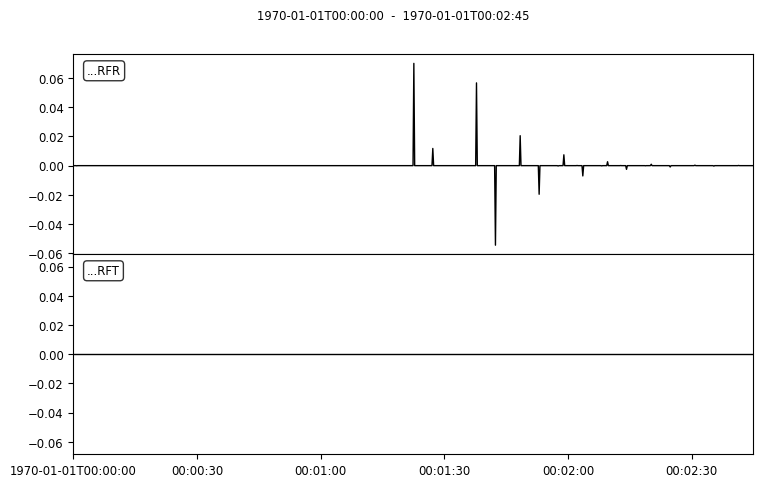

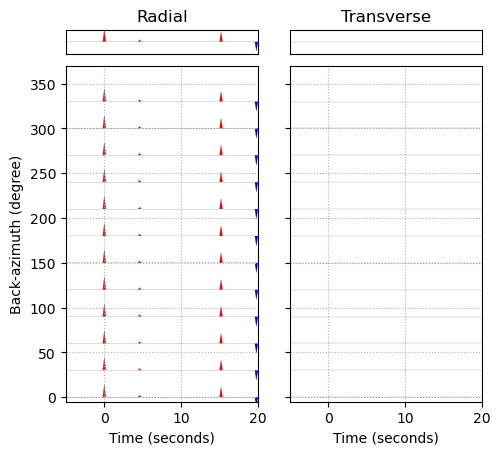

In [160]:
seismogram[10][1].plot()
seismogram.plot('rfs', scale=200)

In [161]:
# wf = op.read('/Users/sina/Desktop/RFCAN/rfcan - Main Model/DATA/RF/1E_AXF_2010_7_30_3_56_14.pkl')
# wf[0].stats

In [1]:
501%500

1

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

# Define a function that takes a parameter and plots something
def plot_map(depth):
    x = np.linspace(0, 10, 100)
    y = np.linspace(0, 10, 100)
    z = np.linspace(0, 10, 100)
    m = np.sqrt(x**2 + y**2 + z**2)
    # plt.imshow(m < depth)
    # plt.colorbar()
    # plt.show()
    
# Create an interactive widget to change the parameter
interact(plot_map, depth=widgets.FloatSlider(min=0, max=10, step=0.1, value=5))

interactive(children=(FloatSlider(value=5.0, description='depth', max=10.0), Output()), _dom_classes=('widget-…

<function __main__.plot_map(depth)>

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np


def f(n, parameter):
    x = np.linspace(0, 10, n)
    y = np.linspace(0, 10, n)
    z = np.linspace(0, parameter, n)
    xx, yy, zz = np.meshgrid(x, y, z)
    m = np.sqrt(xx**1 + yy**2 + zz**2 + 20*np.random.rand(*xx.shape))
    # Plot
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(xx, yy, zz, c=m, cmap='viridis', s=5)
    plt.show()

def visualize(n, parameter):
    f(n, parameter)
    
#pywidgets
import ipywidgets as widgets
from ipywidgets import interact
interact(visualize, n=widgets.IntSlider(min=10, max=100, step=10, value=50), parameter=widgets.FloatSlider(min=1, max=10, step=1, value=5))


interactive(children=(IntSlider(value=50, description='n', min=10, step=10), FloatSlider(value=5.0, descriptio…

<function __main__.visualize(n, parameter)>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data to plot.
x, y = np.meshgrid(np.arange(7), np.arange(10))
z = np.sin(0.5 * x) * np.cos(0.52 * y)

(300, 100, 500) (300, 100, 500) (300, 100, 500) (300, 100, 500)


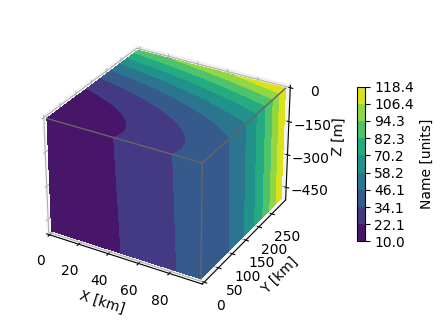

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Define dimensions
Nx, Ny, Nz = 100, 300, 500
X, Y, Z = np.meshgrid(np.arange(Nx), np.arange(Ny), -np.arange(Nz))

# Create fake data
data = (((X+100)**2 + (Y-20)**2 + 2*Z)/1000+1)

kw = {
    'vmin': data.min(),
    'vmax': data.max(),
    'levels': np.linspace(data.min(), data.max(), 10),
}

# Create a figure with 3D ax
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111, projection='3d')

# Plot contour surfaces
_ = ax.contourf(
    X[:, :, 0], Y[:, :, 0], data[:, :, 0],
    zdir='z', offset=0, **kw
)
_ = ax.contourf(
    X[0, :, :], data[0, :, :], Z[0, :, :],
    zdir='y', offset=0, **kw
)
C = ax.contourf(
    data[:, -1, :], Y[:, -1, :], Z[:, -1, :],
    zdir='x', offset=X.max(), **kw
)
# --


# Set limits of the plot from coord limits
xmin, xmax = X.min(), X.max()
ymin, ymax = Y.min(), Y.max()
zmin, zmax = Z.min(), Z.max()
ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])

# Plot edges
edges_kw = dict(color='0.4', linewidth=1, zorder=1e3)
ax.plot([xmax, xmax], [ymin, ymax], 0, **edges_kw)
ax.plot([xmin, xmax], [ymin, ymin], 0, **edges_kw)
ax.plot([xmax, xmax], [ymin, ymin], [zmin, zmax], **edges_kw)

# Set labels and zticks
ax.set(
    xlabel='X [km]',
    ylabel='Y [km]',
    zlabel='Z [m]',
    zticks=[0, -150, -300, -450],
)

# Set zoom and angle view
# ax.view_init(40, -30, 0)
ax.set_box_aspect(None, zoom=0.9)

# Colorbar
fig.colorbar(C, ax=ax, fraction=0.02, pad=0.1, label='Name [units]')

# Show Figure
plt.show()

In [35]:
#3d array
import numpy as np

x = np.array([[[1, 2, 3], [4, 5, 6], [7, 8, 9]],
                [[10, 20, 30], [40, 50, 60], [70, 80, 90]],
                [[100, 200, 300], [400, 500, 600], [700, 800, 900]]])

x = x[2, :, :]
print(x)

[[100 200 300]
 [400 500 600]
 [700 800 900]]


In [28]:
x[0, 1, 2]

6